In [1]:
import pandas as pd
import numpy as np
import lxml

In [2]:
df = pd.read_csv('fatal-police-shootings-data.csv')

In [3]:
df.sample(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
4801,5199,Alex Flores,2019-11-19,shot,knife,34.0,M,H,Los Angeles,CA,False,other,NaN,False
2821,3134,Cornell Lockhart,2017-11-13,shot,knife,67.0,M,B,Tremont,NY,True,attack,Not fleeing,True
3476,3804,Andrew Payne,2018-06-23,shot,gun,38.0,M,NaN,Centennial,CO,False,attack,Car,False
1879,2093,Jose N. Barron Gomez,2016-12-01,shot,gun,NaN,M,H,Tucson,AZ,False,attack,NaN,False
2956,3272,Jonathan William Leroy,2018-01-06,shot,baseball bat,39.0,M,W,McLoud,OK,False,other,Not fleeing,False


In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df.sample(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2346,2605,Albert Gagnier,2017-05-23,shot,gun,74.0,M,W,Knoxville,TN,False,attack,Not fleeing,False
1184,1354,German Gonzalez,2016-03-10,shot,NaN,23.0,M,H,Colorado City,CO,False,attack,Car,False
2039,2706,Matthew Zank,2017-01-28,shot,toy weapon,48.0,M,W,Eau Claire,WI,True,attack,Not fleeing,False
808,953,Jon Ployhar,2015-10-24,shot,undetermined,49.0,M,W,Kenai Peninsula,AK,False,attack,Not fleeing,False
4497,4923,Mauris Nishanga DeSilva,2019-07-31,shot and Tasered,knife,46.0,M,A,Austin,TX,True,other,Not fleeing,False


In [6]:
df2 = df.pivot_table(values='id',index='race', columns='signs_of_mental_illness',aggfunc=len)
df2

signs_of_mental_illness,False,True
race,,
A,69,24
B,1114,184
H,745,157
N,64,14
O,37,11
W,1763,713


In [7]:
df2.loc['A'].sum()

93

In [8]:
df2[True]

race
A     24
B    184
H    157
N     14
O     11
W    713
Name: True, dtype: int64

In [9]:
((df2[True] / (df2[True] + df2[False]))*100).round(2)

race
A    25.81
B    14.18
H    17.41
N    17.95
O    22.92
W    28.80
dtype: float64

In [10]:
def percentage(row):
    return ((row[True] / (row[True] + row[False]))*100).round(2)

In [11]:
df2['race_percentage'] = df2.apply(lambda row: percentage(row),axis=1)
df2

signs_of_mental_illness,False,True,race_percentage
race,,,
A,69,24,25.81
B,1114,184,14.18
H,745,157,17.41
N,64,14,17.95
O,37,11,22.92
W,1763,713,28.80


In [12]:
df2[df2['race_percentage'] == df2['race_percentage'].max()]

signs_of_mental_illness,False,True,race_percentage
race,,,
W,1763,713,28.8


In [5]:
df['week_day'] = df['date'].dt.day_name()
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,week_day
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday


,count
day,
Monday,726
Tuesday,816
Wednesday,829
Thursday,810
Friday,761
Saturday,721
Sunday,753


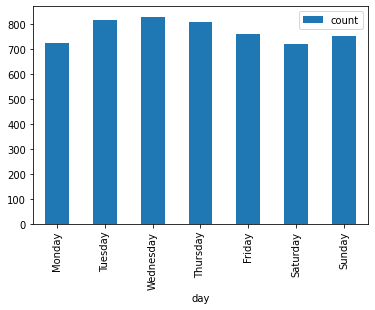

In [6]:
df3 = pd.DataFrame(df['week_day'].value_counts())
df3.reset_index(inplace=True)
df3.rename(columns={'index':'day', 'week_day':'count'}, inplace=True)
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df3 = df3.groupby(['day']).sum().reindex(cats) 
df3.plot(kind = 'bar')
df3

In [66]:
#population = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population', header=0)
#population[0].head()

In [11]:
shortcuts = pd.read_html('https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States', header=0)
shortcuts[1].head()

,"Flag, name andpostal abbreviation[13]","Flag, name andpostal abbreviation[13].1",Cities,Cities.1,Ratification oradmission[C],Population[15],Total area[16],Total area[16].1,Land area[16],Land area[16].1,Water area[16],Water area[16].1,Numberof Reps.
0,"Flag, name andpostal abbreviation[13]","Flag, name andpostal abbreviation[13]",Capital,Largest[17],Ratification oradmission[C],Population[15],mi2,km2,mi2,km2,mi2,km2,Numberof Reps.
1,Alabama,AL,Montgomery,Huntsville,"Dec 14, 1819",5024279,52420,135767,50645,131171,1775,4597,7
2,Alaska,AK,Juneau,Anchorage,"Jan 3, 1959",733391,665384,1723337,570641,1477953,94743,245384,1
3,Arizona,AZ,Phoenix,Phoenix,"Feb 14, 1912",7151502,113990,295234,113594,294207,396,1026,9
4,Arkansas,AR,Little Rock,Little Rock,"Jun 15, 1836",3011524,53179,137732,52035,134771,1143,2961,4


In [16]:
df4 = pd.DataFrame(df['state'].value_counts())
df4.reset_index(inplace=True)
df4.rename(columns={'index':'state_id', 'state':'count'}, inplace=True)
df4.head()

,state_id,count
0,CA,799
1,TX,481
2,FL,350
3,AZ,254
4,CO,195


In [12]:
df5 = shortcuts[1]

In [13]:
df5.drop(0,inplace=True)

In [37]:
df5.rename(columns={'Flag, name andpostal abbreviation[13]':'state', 'Flag, name andpostal abbreviation[13].1':'state_id', 'Population[15]':'population'}, inplace=True)
df5.set_index('state_id', inplace=True)
df5.drop(['Cities','Cities.1','Ratification oradmission[C]','Total area[16]','Total area[16].1','Land area[16]','Land area[16].1','Water area[16]','Water area[16].1','Numberof Reps.'],axis=1,inplace=True)
df5.head()
# df5['population']

state_id
AL     5024279
AK      733391
AZ     7151502
AR     3011524
CA    39538223
CO     5773714
CT     3605944
DE      989948
FL    21538187
GA    10711908
HI     1455271
ID     1839106
IL    12812508
IN     6785528
IA     3190369
KS     2937880
KY     4505836
LA     4657757
ME     1362359
MD     6177224
MA     7029917
MI    10077331
MN     5706494
MS     2961279
MO     6154913
MT     1084225
NE     1961504
NV     3104614
NH     1377529
NJ     9288994
NM     2117522
NY    20201249
NC    10439388
ND      779094
OH    11799448
OK     3959353
OR     4237256
PA    13002700
RI     1097379
SC     5118425
SD      886667
TN     6910840
TX    29145505
UT     3271616
VT      643077
VA     8631393
WA     7705281
WV     1793716
WI     5893718
WY      576851
Name: population, dtype: object

In [17]:
df6 = shortcuts[2]
df6.drop(0,inplace=True)
df6.rename(columns={'Name andpostal abbreviation[13]':'state', 'Name andpostal abbreviation[13].1':'state_id', 'Population[15]':'population'}, inplace=True)
df6.set_index('state_id', inplace=True)
df6.drop(['Established','Total area[16]','Total area[16].1','Land area[16]','Land area[16].1','Water area[16]','Water area[16].1','Numberof Reps.'],axis=1,inplace=True)
df6.head()

,state,population
state_id,,
DC,District of Columbia,689545


In [18]:
df7 = pd.concat([df5,df6])
df7.head()

,state,population
state_id,,
AL,Alabama,5024279
AK,Alaska,733391
AZ,Arizona,7151502
AR,Arkansas,3011524
CA,California,39538223


In [35]:
df10 = df4.join(df7,on='state_id')
df10.head()

,state_id,count,state,population
0,CA,799,California,39538223
1,TX,481,Texas,29145505
2,FL,350,Florida,21538187
3,AZ,254,Arizona,7151502
4,CO,195,Colorado,5773714


In [21]:
#print(df10.isnull().mean())
#print()
print(df10.isnull().sum())

state_id      0
count         0
state         0
population    0
dtype: int64


In [38]:
df10['population'] = df10['population'].apply(pd.to_numeric)

In [39]:
def bonus(row):
    return (row['count']/row['population'])*1000

In [41]:
df10['promil'] = df10.apply(lambda row: bonus(row),axis=1)
df10.head()

,state_id,count,state,population,promil
0,CA,799,California,39538223,0.020208
1,TX,481,Texas,29145505,0.016503
2,FL,350,Florida,21538187,0.016250
3,AZ,254,Arizona,7151502,0.035517
4,CO,195,Colorado,5773714,0.033774


In [42]:
print(df10.isnull().sum())

state_id      0
count         0
state         0
population    0
promil        0
dtype: int64


<AxesSubplot:xlabel='state'>

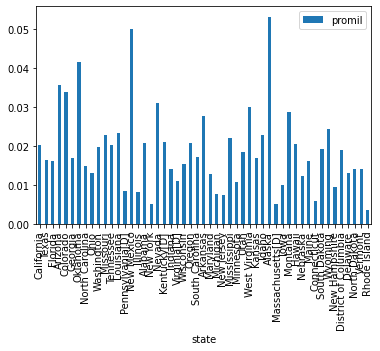

In [44]:
df10.plot(x='state', y='promil', kind = 'bar')